In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

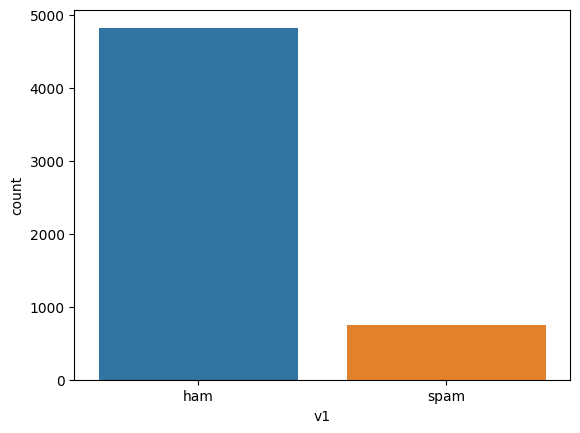

In [8]:
sns.countplot(x='v1', data=df)
plt.show()

Visualizing the distribution of spam and ham emails using a countplot. This helps understand the balance between spam and ham classes.

In [27]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

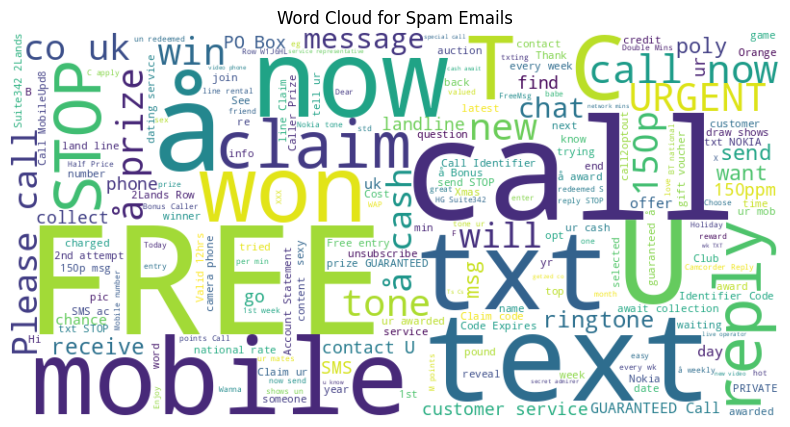

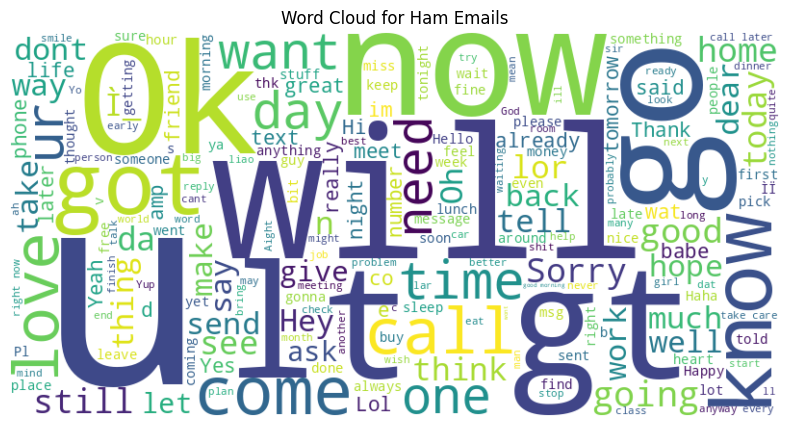

In [14]:
# Word cloud for spam
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['v1']=='spam']['v2']))
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

# Word cloud for ham
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['v1']=='ham']['v2']))
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()


Creating word clouds to visualize the most frequent words in spam and ham emails. This helps identify common terms associated with each category.

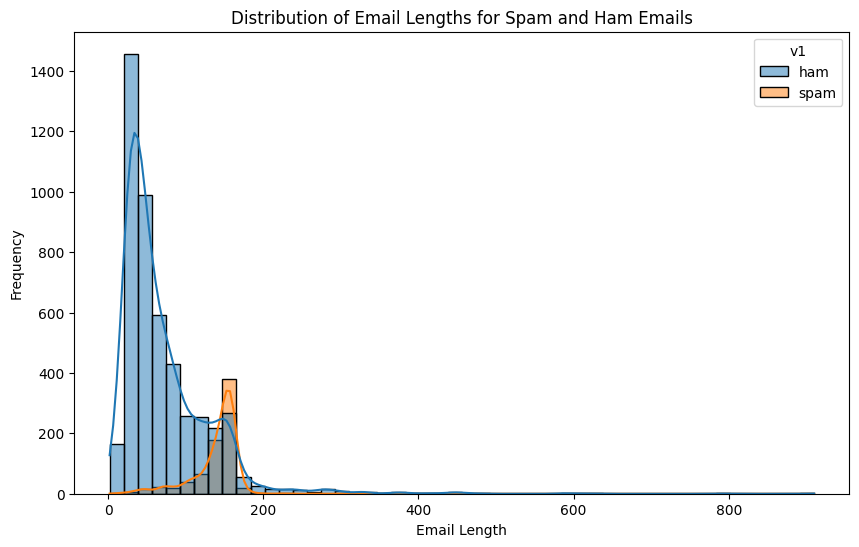

In [15]:
df['email_length'] = df['v2'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='email_length', hue='v1', kde=True, bins=50)
plt.title('Distribution of Email Lengths for Spam and Ham Emails')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.show()


Visualizing the distribution of email lengths for spam and ham emails. This can provide insights into whether there's a difference in email length between spam and ham.

In [16]:
df['num_words'] = df['v2'].apply(lambda x: len(x.split()))

In [17]:
df['uppercase_pct'] = df['v2'].apply(lambda x: (sum(c.isupper() for c in x) / len(x)) * 100)


Creating new features, 'num_words' (number of words in an email) and 'uppercase_pct' (percentage of uppercase letters). These features may help improve the model's understanding of the data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

 Splitting the dataset into training and testing sets. The 'v2' column represents the email content, and 'v1' represents the labels (spam or ham).

In [22]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert the text data into a numerical format suitable for machine learning. The max_features parameter limits the number of features to 5000 to avoid high dimensionality.

In [24]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [25]:
y_pred = model.predict(X_test_vectorized)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Confusion Matrix:
 [[965   0]
 [ 37 113]]


**The initial exploratory data analysis includes checking descriptive statistics, information about the dataset, and visualizing the distribution of spam and ham emails.
Word clouds and email length distribution visualizations offer insights into the content and structure of spam and ham emails.
Feature engineering involves creating new features ('num_words' and 'uppercase_pct') to potentially enhance the model's performance.
The dataset is split into training and testing sets for machine learning.
TF-IDF vectorization is used to convert text data into a numerical format.
A Multinomial Naive Bayes model is trained and evaluated for spam detection.**